In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
dataset = pd.read_csv('headbrain.csv')

In [3]:
dataset.keys()

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [4]:
dataset.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [5]:
X = dataset['Head Size(cm^3)'].values
Y = dataset['Brain Weight(grams)'].values

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
X = sc.fit_transform(X.reshape(-1,1))
Y = sc.fit_transform(Y.reshape(-1,1))
print(X[0:10])
print(Y[:10])

[[ 2.40886829]
 [ 0.28535333]
 [ 1.72023489]
 [ 0.39235214]
 [ 1.4897759 ]
 [-0.13441126]
 [ 0.41430062]
 [-0.2057438 ]
 [-0.05759159]
 [ 0.95478182]]
[[ 2.0579083 ]
 [ 0.11763692]
 [ 0.43407603]
 [-0.00727325]
 [ 2.557549  ]
 [ 0.14261896]
 [ 0.97535345]
 [-0.23211156]
 [ 0.60062293]
 [ 0.76716983]]


C:\Users\Akhilesh Kr. Pandey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Akhilesh Kr. Pandey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Akhilesh Kr. Pandey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Akhilesh Kr. Pandey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
slope = 0 
intercept = 0
alpha = 0.001
epochs = 10000
n = len(X)

for i in range(epochs):
    y_pred = slope * X + intercept
    D_slope = (-2/n)*sum(X*(Y-y_pred))
    D_intercept = (-2/n)*sum(Y-y_pred)
    
    slope = slope - (alpha*D_slope)
    intercept = intercept - (alpha*D_intercept)
    #print(slope,intercept)
    
print(slope,intercept)

[0.79956971] [-3.32754921e-16]


In [9]:
pred = slope*X + intercept 

In [10]:
y_pred_trans = sc.inverse_transform(pred)

In [11]:
X_trans = sc.inverse_transform(X)
Y_trans = sc.inverse_transform(Y)

In [12]:
print(y_pred_trans[0:10])
print(X_trans[0:10])
print(Y_trans[0:10])

[[1514.16660036]
 [1310.27229201]
 [1448.04583628]
 [1320.54603622]
 [1425.91777181]
 [1269.96760315]
 [1322.65347094]
 [1263.11844033]
 [1277.34362464]
 [1374.54905071]]
[[1572.14548547]
 [1317.14044162]
 [1489.45005135]
 [1329.98953298]
 [1461.77508536]
 [1266.73246784]
 [1332.62524403]
 [1258.16640694]
 [1275.95745651]
 [1397.52962857]]
[[1530.]
 [1297.]
 [1335.]
 [1282.]
 [1590.]
 [1300.]
 [1400.]
 [1255.]
 [1355.]
 [1375.]]


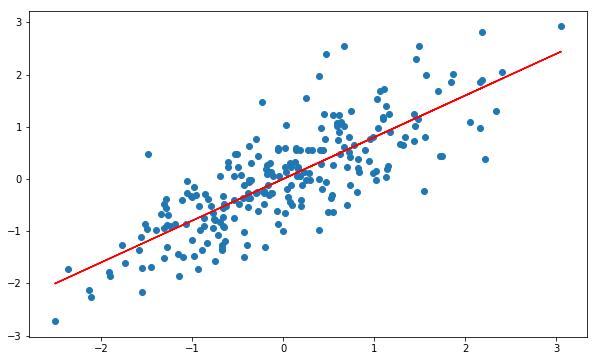

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
#Before feature scaling
plt.scatter(X,Y)
plt.plot(X,pred,'r')

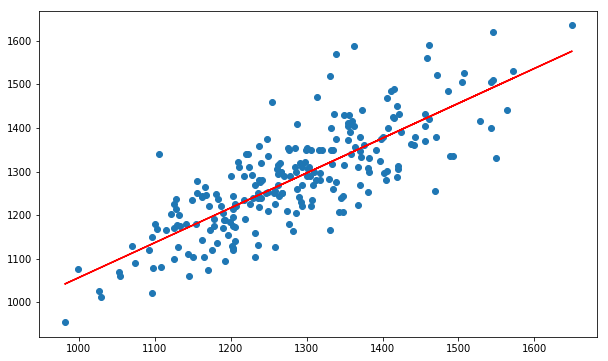

In [21]:
#After feature scaling 
plt.figure(figsize=(10,6))
plt.scatter(X_trans,Y_trans)
plt.plot(X_trans,y_pred_trans,'r')

In [22]:
mse = mean_squared_error(Y_trans,y_pred_trans)
rmse = np.sqrt(mse)

In [23]:
print(mse,rmse)

5201.384028002329 72.1206213783709


In [24]:
for i in range(10):
    print('Actual :{}, Prediction:{}'.format(Y_trans[i],y_pred_trans[i]))

Actual :[1530.], Prediction:[1514.16660036]
Actual :[1297.], Prediction:[1310.27229201]
Actual :[1335.], Prediction:[1448.04583628]
Actual :[1282.], Prediction:[1320.54603622]
Actual :[1590.], Prediction:[1425.91777181]
Actual :[1300.], Prediction:[1269.96760315]
Actual :[1400.], Prediction:[1322.65347094]
Actual :[1255.], Prediction:[1263.11844033]
Actual :[1355.], Prediction:[1277.34362464]
Actual :[1375.], Prediction:[1374.54905071]
